In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('C:/All Programming/Udamy Ml course/Machine Learning/dataset/mall.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
x = df.iloc[:, [3,4]].values
x.shape

(200, 2)

- Scale features (important for K-Means!)

In [6]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

- K-Means clustering

In [7]:
kmeans = KMeans(n_clusters=3, random_state=42, max_iter=300)
clusters = kmeans.fit_predict(x_scaled)

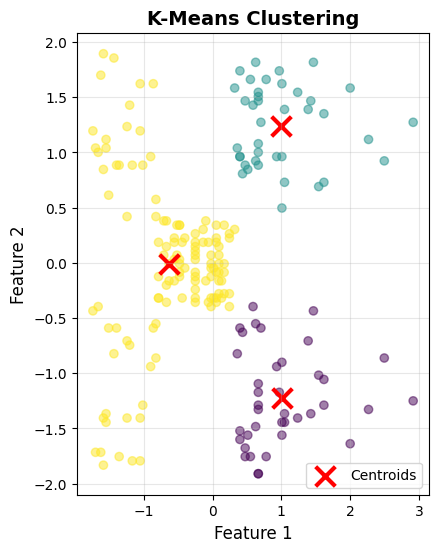

In [9]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)

plt.scatter(x_scaled[:, 0], x_scaled[:, 1], c=clusters, cmap='viridis', alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=200, c='red', linewidths=3, label='Centroids')
plt.xlabel('Feature 1', fontsize=12)
plt.ylabel('Feature 2', fontsize=12)
plt.title('K-Means Clustering', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

In [10]:
# multiple metrics
silhouette = silhouette_score(x_scaled, clusters)
calinski = calinski_harabasz_score(x_scaled, clusters)
davies = davies_bouldin_score(x_scaled, clusters)

print(f"Silhouette Score: {silhouette:.3f} (higher is better, range: -1 to 1)")
print(f"Calinski-Harabasz Score: {calinski:.2f} (higher is better)")
print(f"Davies-Bouldin Score: {davies:.3f} (lower is better)")

Silhouette Score: 0.467 (higher is better, range: -1 to 1)
Calinski-Harabasz Score: 151.34 (higher is better)
Davies-Bouldin Score: 0.716 (lower is better)


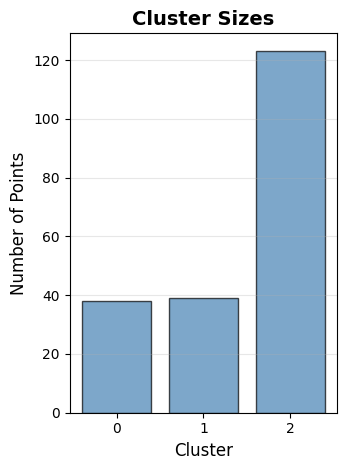

In [11]:
plt.subplot(1, 2, 2)
unique, counts = np.unique(clusters, return_counts=True)

plt.bar(unique, counts, color='steelblue', alpha=0.7, edgecolor='black')
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Number of Points', fontsize=12)
plt.title('Cluster Sizes', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

**Optimal Number of Clusters**

1. **Elbow Method**: Find the "elbow" in inertia plot
2. **Silhouette Score**: Maximize silhouette score
3. **Gap Statistic**: Compare with null reference
4. **Domain Knowledge**: Use business requirements

- Elbow Method

In [12]:
inertias = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(x_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(x_scaled, kmeans.labels_))

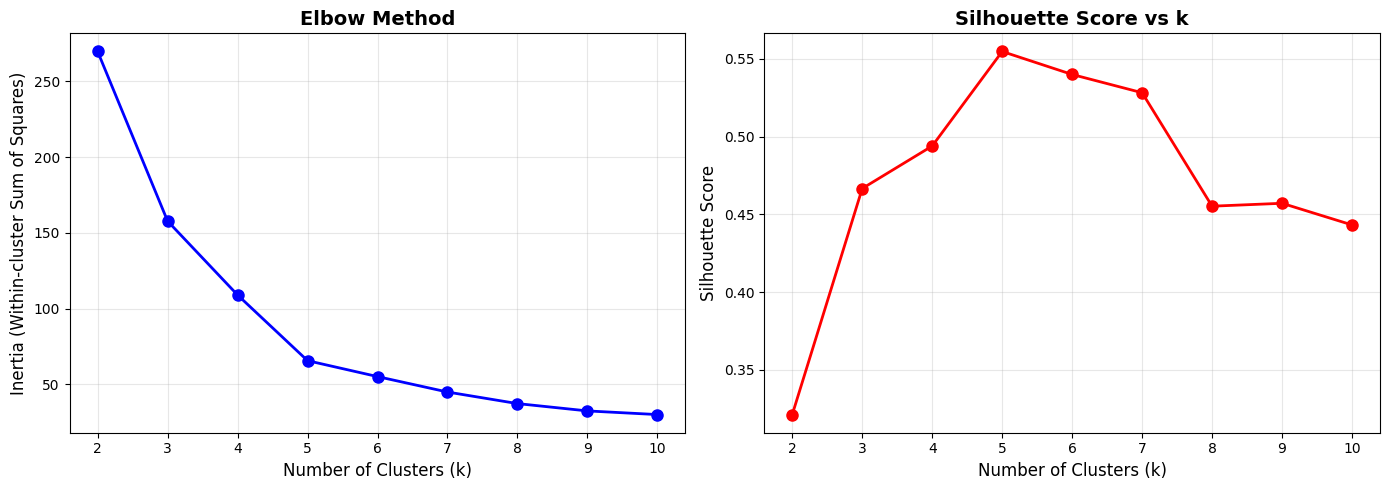

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Elbow plot
axes[0].plot(k_range, inertias, 'bo-', linewidth=2, markersize=8)
axes[0].set_xlabel('Number of Clusters (k)', fontsize=12)
axes[0].set_ylabel('Inertia (Within-cluster Sum of Squares)', fontsize=12)
axes[0].set_title('Elbow Method', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Silhouette score plot
axes[1].plot(k_range, silhouette_scores, 'ro-', linewidth=2, markersize=8)
axes[1].set_xlabel('Number of Clusters (k)', fontsize=12)
axes[1].set_ylabel('Silhouette Score', fontsize=12)
axes[1].set_title('Silhouette Score vs k', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [15]:
# Find optimal k
optimal_k_silhouette = k_range[np.argmax(silhouette_scores)]
print(f"Optimal k (Silhouette): {optimal_k_silhouette}")
print(f"Best Silhouette Score: {max(silhouette_scores):.3f}")

Optimal k (Silhouette): 5
Best Silhouette Score: 0.555
